### Base de dados Wines
O dataset pode ser encontrado [aqui](https://archive.ics.uci.edu/ml/datasets/Wine)
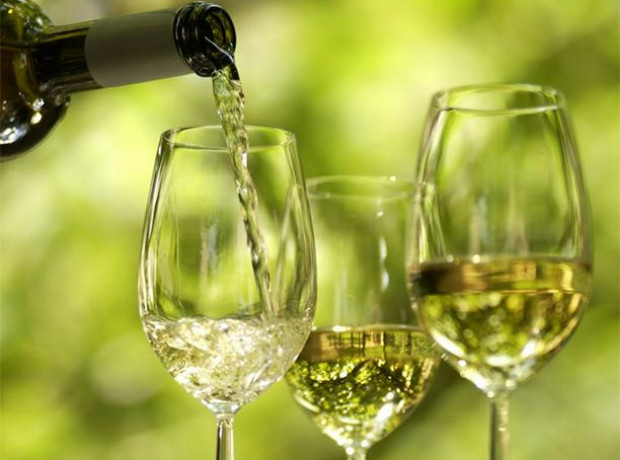

In [1]:
from minisom import MiniSom
import pandas as pd

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Temos 14 colunas presentes no dataset fornecido, sendo três delas variáveis características (dados de entrada) e um delas uma variável-alvo (que queremos que o nosso modelo seja capaz de prever).

As variáveis características são:

    Álcool
    Ácido málico
    Cinzas
    Alcalinidade das cinzas
    Magnésio
    Fenóis totais
    Flavanóides
    Fenóis não flavonóides
    Proantocianinas
    Intensidade de cor
    Matiz
    OD280 / OD315 de vinhos diluídos
    Prolina

A variável-alvo é:

    Class    - um tipo *binário* que indica a classe de cada vinho 
            1      - Vinho do tipo 1
            2      - Vinho do tipo 2
            3      - Vinho do tipo 3    

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [4]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3    Ash                          178 non-null    float64
 4    Alcalinity of ash            178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

É notado que existem variáveis do tipo ``float64`` (números "decimais") e variáveis do tipo ``int64`` (números "inteiros")

Já que todos os valores do nosso dataset são numéricos, nós não precisaremos fazer o a transformação do tipo "object" para o tipo númerico.

###### Divisão das variáveis caractéristicas e da variável-alvo

In [6]:
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values

#### Normalização dos dados
Podemos observar que os nossos dados estão em escalas diferentes das demais, para isso iremos utilizar a função ``MinMaxScaler`` para realizar a normalização dos dados.

In [7]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

###### Utilizando a biblioteca de Implementação minimalista dos Mapas Auto-Organizáveis (SOM)
A biblioteca pode ser encontrada neste link: https://pypi.org/project/MiniSom/

###### Parâmetros do MiniSom
Link do repositório no github: https://github.com/JustGlowing/minisom

    x - Quantidade de linhas do mapa  (de acordo com a fórmula)
    y - Quantidade de colunas do mapa (de acordo com a fórmula)
    input_len - Quantidade de atributos (colunas)
    sigma - Alcance dos neurônios a serem pegos
    learning_rate - Taxa de aprendizagem
    random_seed - Semente aleatória (sempre ter o mesmoresultado)
    data - Dados de entrada
    num_iteration - número de interações (parecido com as 'epochs')

In [8]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)

som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [9]:
# Blocos de pesos gerados
som._weights

array([[[0.70131949, 0.36337684, 0.56156797, 0.3118548 , 0.4185263 ,
         0.64764234, 0.53698623, 0.31120383, 0.45919752, 0.30532271,
         0.49349353, 0.77926949, 0.50345425],
        [0.74861809, 0.35833314, 0.59685137, 0.3564671 , 0.42000125,
         0.6253593 , 0.5346939 , 0.26475606, 0.40558847, 0.30929045,
         0.4495389 , 0.79887129, 0.52846386],
        [0.66746734, 0.25195255, 0.65024854, 0.49082793, 0.3822516 ,
         0.61557733, 0.49725028, 0.34537729, 0.41018632, 0.26970557,
         0.51639184, 0.74163887, 0.4366652 ],
        [0.54170046, 0.2382528 , 0.71513533, 0.66336169, 0.42310159,
         0.62628814, 0.52908302, 0.37463815, 0.43851813, 0.21837788,
         0.57034468, 0.7399189 , 0.34143898],
        [0.46115985, 0.18785568, 0.60341585, 0.59567604, 0.28955914,
         0.50762584, 0.41401584, 0.40600125, 0.39724966, 0.15788619,
         0.61830726, 0.64336887, 0.27236141],
        [0.3130839 , 0.18237247, 0.55562323, 0.59056626, 0.19864228,
         0.

In [10]:
# Valores do mapa auto organizável (8x8)
som._activation_map

array([[1.01560772, 1.05313833, 1.02100585, 1.0352192 , 0.96203426,
        1.01321676, 0.93726224, 0.85173591],
       [1.06044091, 1.01780306, 0.97892247, 0.93464118, 0.92679433,
        0.98293007, 0.99959128, 0.81839552],
       [0.99891411, 0.99895891, 0.93800317, 0.87154298, 0.90950204,
        0.92567972, 0.943536  , 0.83227115],
       [1.01134155, 1.01697567, 0.99154026, 0.89684686, 0.90215515,
        0.99299267, 0.93110174, 0.88462994],
       [1.0012844 , 1.01483031, 1.00259421, 0.93350264, 1.01414887,
        1.08401493, 1.00342151, 1.03490977],
       [0.95867054, 0.96730981, 0.98554186, 0.99830594, 1.04265189,
        1.03622173, 1.04189969, 1.17724767],
       [1.01476992, 0.99994799, 1.08541318, 1.14930186, 1.10148402,
        1.00765431, 0.95793779, 0.97759854],
       [0.97883048, 1.00938649, 1.18305814, 1.2491865 , 1.15290879,
        1.02584007, 0.94901646, 0.9362365 ]])

In [11]:
# Quantidade de vezes que os neurônios foram selecionados como principal
q = som.activation_response(X)
q

array([[ 0.,  3.,  1.,  5.,  0.,  5.,  2.,  7.],
       [ 2.,  1.,  2.,  2.,  3.,  3.,  5.,  2.],
       [ 4.,  1.,  1.,  4.,  4.,  4.,  1.,  1.],
       [ 3.,  1.,  2.,  1.,  1.,  2.,  0.,  0.],
       [ 0.,  1.,  2.,  1.,  0.,  4.,  2.,  1.],
       [ 3.,  0.,  1.,  3.,  0.,  0.,  3., 45.],
       [ 1.,  1.,  1.,  1.,  5.,  3.,  0.,  0.],
       [ 6.,  0.,  3.,  7.,  2.,  1.,  1.,  7.]])

###### Geração do gráfico

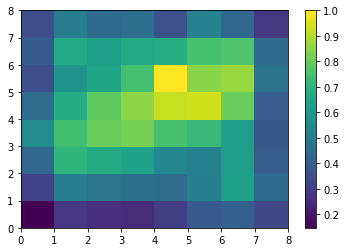

In [12]:
# MID - Média da distância de cada um dos neurônios
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
# Quanto mais escuro ele for, mais parecido ele é dos seus vizinhos
# Quanto mais claro ele for, mais diferente ele é dos seus vizinhos

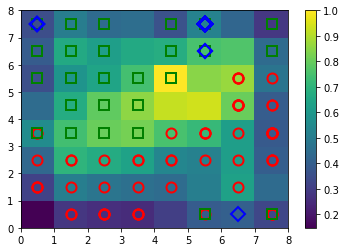

In [13]:
# Geração do mapa
pcolor(som.distance_map().T)
colorbar()
w = som.winner(X[2])
# marcadores
markers = ['o', 's', 'D']
# cores
color = ['r', 'g', 'b']
# conversão
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2
# geração do mapa com os marcadores e as cores
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)